#PyBer Ridesharing Analysis

##Overview

Pyber is a nascent ridesharing company. With two of their data sets, one containing the drivers and cities in their service areas and one containing individual ride records, we will create a bubble plot that shows the relationships among:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, we will make three pie charts that show:
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [1]:
# Dependencies.

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd = os.path.abspath(".") # Establish current directory.

# Read our data from csv files into two data frames.

cityDf = pd.read_csv(os.path.join(cd, 'city_data.csv'))
rideDf = pd.read_csv(os.path.join(cd, 'ride_data.csv'))
              
# Print the "city_data" data frame: it appears to describe the city name, number of drivers per city, and
# The city's type (rural, suburban, and rural)

cityDf.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# We have 126 city records in our dataframe.

len(cityDf)

126

In [4]:
# One of the cities appears twice, before we join our city data with our ride data, 
# we need to eliminate the duplicate. We can do this by grouping by city names and applying
# an aggregate function. Here we use sum, which assumes that we have two separate but valid observations
# for the duplicated city. We could use mean instead if we thought that the duplicate
# reppresents two valid observations over time. 


cityGrouped = cityDf.groupby(['city', 'type']).sum().reset_index()
len(cityGrouped)

125

In [5]:
# Print the head of the "ride_data" data frame: it appears to list records that describe individual rides
# with the city, datetime, fare, and unique ride_id for each ride.

rideDf.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
# Our ride data frame has 2375 records. 

len(rideDf)

2375

In [7]:
# Merge the two data frames using a left join with the ride_data data frame as the left table,
# we can use this to summarize stats for our bubble chart and two of our pie charts later on.

ridesCity = pd.merge(rideDf, cityGrouped, how='left', left_on = 'city', right_on = 'city')

In [8]:
# Print the head of the combined dataframe.

ridesCity.head() 

,city,date,fare,ride_id,type,driver_count
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,Urban,46
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,Urban,35
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,Urban,55
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,Urban,68
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,Urban,8


In [9]:
# Print the length of the new data frame

len(ridesCity)

2375

In [10]:
# Aggregate summaries for total 
stats1 = {'ride_id': ['count'], 'fare': ['mean'] }

# Groupby type and aggregate counts and means using our dictionary:

ridesCitySummary = ridesCity.groupby(['city', 'type','driver_count'], as_index = False).agg(stats1)
ridesCitySummary.reset_index(inplace = True)
list(ridesCitySummary)

[('index', ''),
 ('city', ''),
 ('type', ''),
 ('driver_count', ''),
 ('ride_id', 'count'),
 ('fare', 'mean')]

In [11]:
ridesCitySummary.head()

,index,city,type,driver_count,ride_id,fare
,,,,,count,mean
0,0,Alvarezhaven,Urban,21,31,23.928710
1,1,Alyssaberg,Urban,67,26,20.609615
2,2,Anitamouth,Suburban,16,9,37.315556
3,3,Antoniomouth,Urban,21,22,23.625000
4,4,Aprilchester,Urban,49,19,21.981579


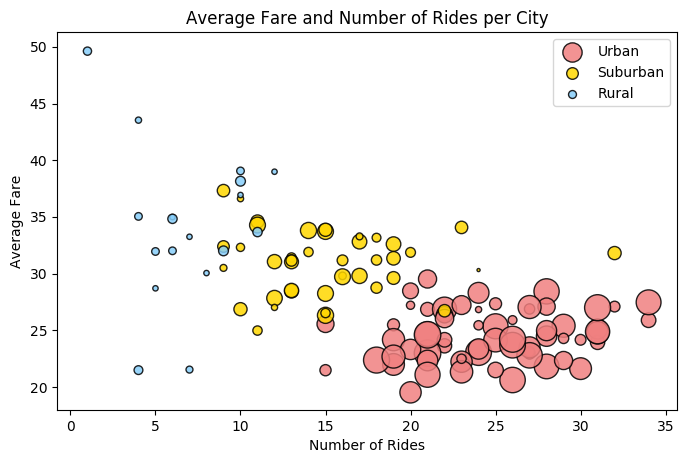

In [12]:
figa = plt.figure(figsize=(8, 5), dpi= 100)
colors = ['lightcoral', 'gold', 'lightskyblue']
ax1 = figa.add_subplot(1,1,1)

for i, color in  zip(ridesCitySummary['type'].unique(), colors):
    series = ridesCitySummary[ridesCitySummary['type'] == i]
    
    ax1.scatter(
        series.ride_id, 
        series.fare,
        label = i,
        s = series.driver_count * 5, # Multiplying by 5 overstates the size to make it more like a bubble chart.
        c = color,
        alpha=.85,
        edgecolor='black'
    )
ax1.legend()
ax1.set_xlabel('Number of Rides')
ax1.set_ylabel('Average Fare')
ax1.set_title('Average Fare and Number of Rides per City')
plt.show()

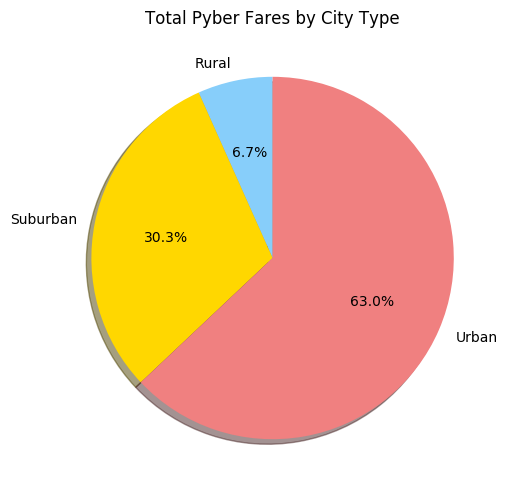

In [13]:
# For our first two pie charts we want to find the ride count and average fare by city
# type, which we can do by aggregating our original data frame using sum() and count().

stats = {'ride_id': ['count'], 'fare': ['sum'] }

# Groupby type and aggregate counts and sums using our dictionary:

rideFareSummary = ridesCity.groupby(['type']).agg(stats).reset_index()

colors = ['lightskyblue', 'gold', 'lightcoral']
sizes1 = rideFareSummary.fare
labels1 = rideFareSummary.type

figb = plt.figure(figsize=(6, 6), dpi= 100)
ax2 = figb.add_subplot(1,1,1)

ax2.pie(sizes1, labels=labels1, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax2.set_aspect('equal', adjustable='box') 
ax2.set_title("Total Pyber Fares by City Type")


plt.show()

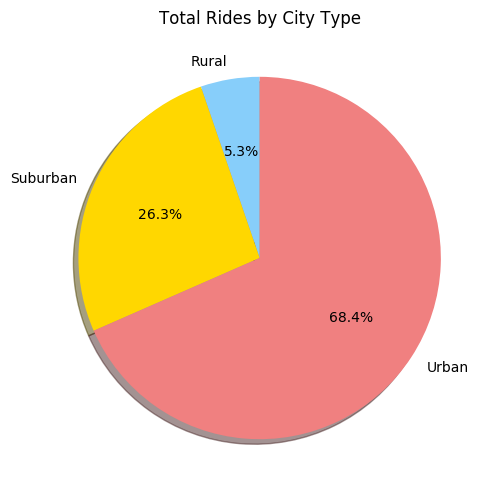

In [14]:
# We can reuse our rideFareSummary data frame for this plot too.

sizes2 = rideFareSummary.ride_id
labels2 = rideFareSummary.type

figc = plt.figure(figsize=(6, 6), dpi= 100)
ax3 = figc.add_subplot(1,1,1)

ax3.pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax3.set_aspect('equal', adjustable='box') 
ax3.set_title("Total Rides by City Type")


plt.show()

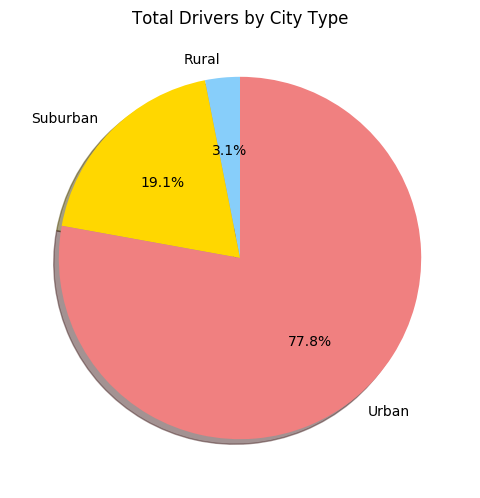

In [15]:
# For our last pie chart, we only need to find the number of drivers per type of city
# All of this data is contained in our original cityDf data frame, which we group by driver
# count using sum().

driverCitySummary = cityGrouped.groupby(['type']).driver_count.sum()

sizes3 = driverCitySummary.values
labels3 = driverCitySummary.index

figd = plt.figure(figsize=(6, 6), dpi= 100)
ax4 = figd.add_subplot(1,1,1)

ax4.pie(sizes3, labels=labels3, autopct='%1.1f%%',  colors=colors, shadow=True, startangle=90)
ax4.set_aspect('equal', adjustable='box') 
ax4.set_title("Total Drivers by City Type")

plt.show()

## Some Conclusions

1. With some exceptions, the average fare per ride in a city decreases with the density of the city.
2. Simialry, the productivity of drivers seems to go up as they drive in less populated areas, with the most productive drivers in rural cities (where they are 3.1% of total Pyber drivers making 6.7% of pyber's fares).
3. There are serveral cities whose type doesn't reflect the average fare and ride volume of that city type. If Pyber is targeting features or promotions towards riders using a segmentation strategy that includes city type, they may want to consider how to treat some of these 'misplaced' cities.
